In [1]:
import voxelsss as vox
import numpy as np
import matplotlib.pyplot as plt
import diffrax as dfx


In [2]:
model = vox.CahnHilliardInversionModel(Nx=100, Ny=100, Nz=100, Lx=100, Ly=100, Lz=100, eps=3.0, A=0.25)

In [3]:
saveat = dfx.SaveAt(ts=np.linspace(0, 100, 100))

In [4]:
res = model.solve({"D": 1.0}, 0.5 + 0.1*np.random.rand(model.Nx, model.Ny, model.Nz), saveat, dt0=0.1)

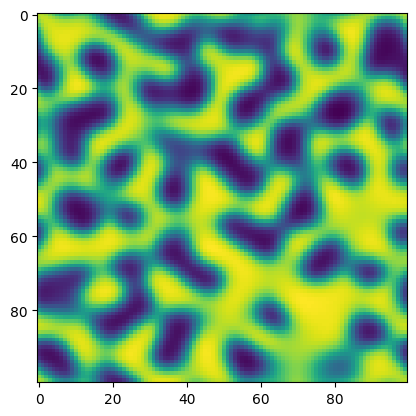

In [6]:
plt.imshow(res[-1,:,:,res.shape[-1]//2])

In [7]:
data = {}
data["ts"] = saveat.subs.ts
data["ys"] = res

inds = [[10,20,30], [40,50,60], [70,80,90]]

In [8]:
tmp = model.train({"D": np.array([2.0])}, data, inds, max_steps=50)

Step: 0, Accepted steps: 0, Steps since acceptance: 0, Loss on this step: 12325.431640625, Loss on the last accepted step: 0.0, Step size: 1.0
Step: 1, Accepted steps: 1, Steps since acceptance: 0, Loss on this step: 482.1257019042969, Loss on the last accepted step: 12325.431640625, Step size: 3.5
Step: 2, Accepted steps: 2, Steps since acceptance: 0, Loss on this step: 0.09654243290424347, Loss on the last accepted step: 482.1257019042969, Step size: 12.25
Step: 3, Accepted steps: 3, Steps since acceptance: 0, Loss on this step: 2.461564747591183e-07, Loss on the last accepted step: 0.09654243290424347, Step size: 42.875
Step: 4, Accepted steps: 4, Steps since acceptance: 0, Loss on this step: 2.454249283800891e-07, Loss on the last accepted step: 2.461564747591183e-07, Step size: 42.875


In [9]:
print(tmp.value['D'])

[0.99999815]
